# Libraries

In [1]:
# install.packages('')

In [1]:
library(caTools)
library(ggplot2)
library(repr)
options(repr.plot.width=4, repr.plot.height=4)
library(e1071)
library(caret)

Loading required package: lattice


# Read data

In [2]:
root_dir="~/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/"
work_dir="Course data/Part 3 - Classification/Section 17 - Kernel SVM"
setwd(paste(root_dir,work_dir,sep=''))
df=read.csv('Social_Network_Ads.csv')[c('Age','EstimatedSalary','Purchased')]
str(df)

'data.frame':	400 obs. of  3 variables:
 $ Age            : int  19 35 26 27 19 27 27 32 25 35 ...
 $ EstimatedSalary: int  19000 20000 43000 57000 76000 58000 84000 150000 33000 65000 ...
 $ Purchased      : int  0 0 0 0 0 0 0 1 0 0 ...


# Scale

In [3]:
df[,c('Age','EstimatedSalary')]=scale(df[,c('Age','EstimatedSalary')])
str(df)

'data.frame':	400 obs. of  3 variables:
 $ Age            : num  -1.78 -0.253 -1.112 -1.016 -1.78 ...
 $ EstimatedSalary: num  -1.488 -1.459 -0.784 -0.374 0.184 ...
 $ Purchased      : int  0 0 0 0 0 0 0 1 0 0 ...


# Factor labels

In [10]:
df$Purchased=factor(df$Purchased)
str(df)

'data.frame':	400 obs. of  3 variables:
 $ Age            : num  -1.78 -0.253 -1.112 -1.016 -1.78 ...
 $ EstimatedSalary: num  -1.488 -1.459 -0.784 -0.374 0.184 ...
 $ Purchased      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 1 1 ...


# Train/test

In [11]:
set.seed(123)
split=sample.split(df$Purchased, SplitRatio=0.75)
training_set=subset(df,split)
test_set=subset(df,!split)
writeLines(noquote(paste('Training set:',paste(dim(training_set),collapse='x'))))
writeLines(noquote(paste('Test set:',paste(dim(test_set),collapse='x'))))

Training set: 300x3
Test set: 100x3


# Grid search

In [17]:
svm=train(form=Purchased~.,data=training_set,
          method='svmRadial')
svm

Support Vector Machines with Radial Basis Function Kernel 

300 samples
  2 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 300, 300, 300, 300, 300, 300, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.9120283  0.8117567
  0.50  0.9146368  0.8172709
  1.00  0.9189225  0.8265133

Tuning parameter 'sigma' was held constant at a value of 1.223244
Accuracy was used to select the optimal model using  the largest value.
The final values used for the model were sigma = 1.223244 and C = 1.

In [18]:
range_plot_X=function(x,num,ext){
    delta=max(x)-min(x)
    return(seq(min(x)-ext*delta,max(x)+ext*delta,length.out=num))
}

In [19]:
X_plot=range_plot_X(df$Age,1000,0.1)
Y_plot=range_plot_X(df$EstimatedSalary,1000,0.1)
XY_grid=expand.grid(X_plot,Y_plot)
colnames(XY_grid)=c('Age','EstimatedSalary')


=== Kernel: radial ===

Classifier summary:
Length  Class   Mode 
     1   ksvm     S4 
Confusion matrix:
   y_pred
     0  1
  0 59  5
  1  6 30


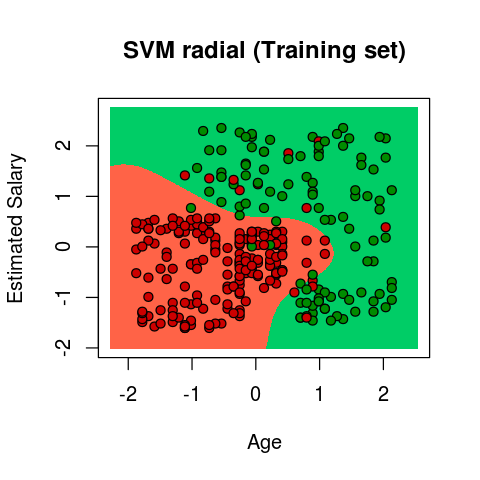

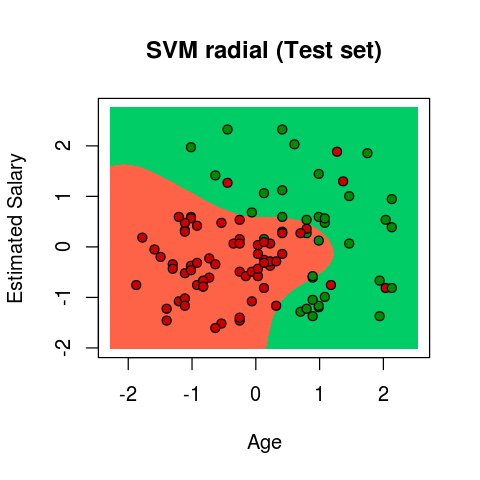

In [20]:
kernel='radial'
writeLines(paste('\n=== Kernel:',kernel,'==='))
svm_classifier=svm
writeLines('\nClassifier summary:')
print(summary(svm_classifier))
y_pred=predict(svm_classifier,newdata=test_set)
writeLines('Confusion matrix:')
print(table(test_set$Purchased,y_pred))
y_pred_grid=predict(svm_classifier,newdata=XY_grid)
plot(df[c('Age','EstimatedSalary')],
     main=paste('SVM',kernel,'(Training set)'),
     xlab='Age',ylab='Estimated Salary',
     xlim=range(X_plot),ylim=range(Y_plot))
contour(X_plot,Y_plot,matrix(as.numeric(y_pred_grid),length(X_plot),length(Y_plot)),add=TRUE)
points(XY_grid,pch='.',col=ifelse(y_pred_grid==1,'springgreen3','tomato'))
points(training_set[c('Age','EstimatedSalary')],pch=21,bg=ifelse(training_set$Purchased==1,'green4','red3'))
plot(df[c('Age','EstimatedSalary')],
     main=paste('SVM',kernel,'(Test set)'),
     xlab='Age',ylab='Estimated Salary',
     xlim=range(X_plot),ylim=range(Y_plot))
contour(X_plot,Y_plot,matrix(as.numeric(y_pred_grid),length(X_plot),length(Y_plot)),add=TRUE)
points(XY_grid,pch='.',col=ifelse(y_pred_grid==1,'springgreen3','tomato'))
points(test_set[c('Age','EstimatedSalary')],pch=21,bg=ifelse(test_set$Purchased==1,'green4','red3'))